In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [93]:
processing_dir = '/Users/crystal.butler/Documents/Code_Projects/MiFace/Python/data/Distance_Output/MiFace_2.1-0003/'
os.chdir(processing_dir)
os.getcwd()


'/Users/crystal.butler/Documents/Code_Projects/MiFace/Python/data/Distance_Output/MiFace_2.1-0003'

In [94]:
# Read in all-pairs similarity scores.
scores_dir = 'Score_Lists/'
labels_dir = 'Label_Lists/'

In [103]:
(_, _, score_filename) = next(os.walk(scores_dir))
(_, _, label_filename) = next(os.walk(labels_dir))
print(score_filename)
print(label_filename)
score_path = os.path.join(scores_dir, score_filename[0])
label_path = os.path.join(labels_dir, label_filename[0])
print(score_path)
print(label_path)

['0003.pairs.txt_scores.txt']
['0003.pairs.txt_labels.txt']
Score_Lists/0003.pairs.txt_scores.txt
Label_Lists/0003.pairs.txt_labels.txt


In [104]:
pairs_scores = pd.read_csv(score_path, header=None)
# Read in the list of scored words.
labels = pd.read_csv(label_path, header=None)

In [105]:
print(type(pairs_scores))
print(type(labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
pairs_scores.head()

,0
0,0.329435
1,0.264609
2,0.253338
3,0.158340
4,0.100460


In [7]:
labels.head()

,0
0,serious
1,emotional
2,apprehensive
3,pensive
4,indifferent


In [106]:
# Transform similarity (proximity) scores to distances.
pairs_distances = 1 - pairs_scores
pairs_distances.head()

,0
0,0.670565
1,0.735391
2,0.746662
3,0.841660
4,0.899540


In [107]:
# Create the distance array.
distances_array = np.array(pairs_distances[0][:])
labels_array = np.array(labels[0][:])
sizeof_da = distances_array.shape
print(sizeof_da)
print(len(sizeof_da))
sizeof_la = labels_array.shape
print(sizeof_la)
print(len(sizeof_la))

(780,)
1
(40,)
1


In [108]:
print(type(distances_array))
print(distances_array.shape)
print(type(labels_array))
print(labels_array.shape)

<class 'numpy.ndarray'>
(780,)
<class 'numpy.ndarray'>
(40,)


In [109]:
# Create the linkage matrix Z.
lnk = sch.linkage(distances_array, 'average')
print(lnk.shape)

# Fix distances that have become less than 0 due to floating point errors.
for i in range(len(lnk)):
    if lnk[i][2] < 0:
        lnk[i][2] = 0

(39, 4)


In [111]:
filename = os.path.basename(score_path)
print(filename)
image_number = filename.split('.')[0]
print(image_number)

0003.pairs.txt_scores.txt
0003


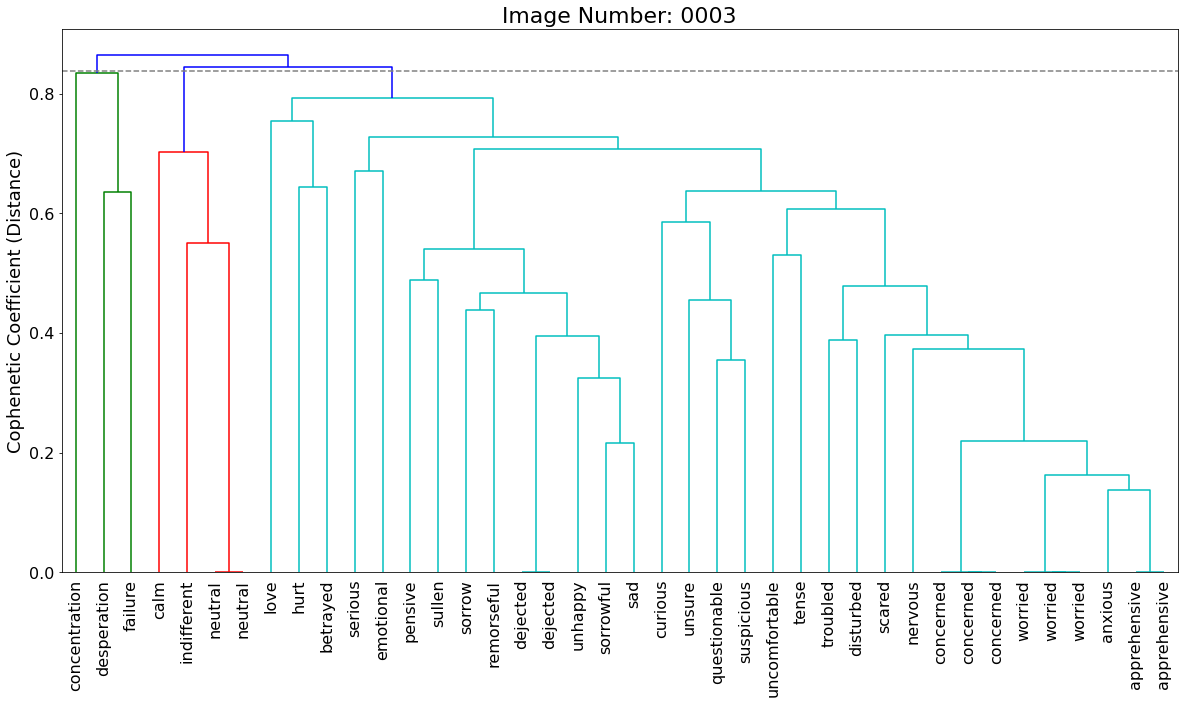

In [115]:
# Set up the plot.
plt.figure(figsize=(20, 10))
title = "Image Number: " + image_number
plt.title(title, fontsize = 22)
plt.rc('ytick',labelsize=16)
plt.ylabel('Cophenetic Coefficient (Distance)', fontsize=18)
plt.axhline(y=0.8375, color="grey", linestyle="--")

# Create the dendrogram, with a cutoff of 0.8375.
dend = sch.dendrogram(lnk, labels=labels_array, color_threshold=0.8375, leaf_font_size=16, leaf_rotation=90, count_sort='ascending')
plt.show()

In [58]:
# Get the values needed to determine cluster membership statistic.
clusters = sch.fcluster(lnk, 0.8375, criterion='distance')
cluster_count = len(np.unique(clusters))
cluster_enumeration = np.unique(clusters)
print(type(clusters))
print(cluster_enumeration)
print(cluster_count)

<class 'numpy.ndarray'>
[1 2 3]
3


In [57]:
# Calculate the cophenetic correlation coefficient statistic: closer to 1 is better.
cophenetic_coefficient, cophenetic_list = sch.cophenet(lnk, distances_array)
print(cophenetic_coefficient)

0.8774072595122155


In [81]:
# Get membership counts for each cluster.
cluster_membership = {}
for value in cluster_enumeration:
    member_count = np.count_nonzero(clusters == value)
    cluster_membership[value] = member_count
for key in cluster_membership.keys():
    print(key, '\t', cluster_membership[key])

1 	 3
2 	 4
3 	 33


In [87]:
# Calculate the percentage membership in the largest cluster.
c_max = max(cluster_membership.values())
c_sum = sum(cluster_membership.values())
pct = 100 * (c_max / c_sum)
print(f"Percent membership in largest cluster: {pct}")

Percent membership in largest cluster: 82.5


In [89]:
# Classify the clustering as passing or failing, based on percent membership in the largest cluster.
pass_fail = 'pass' if pct >= 75 else 'fail'
print(pass_fail)

pass


0003.pairs.txt_scores.txt
0003
